###Concepts covered here

##1. Early stopping
##2. Data scaling
##3. Drop out
##4. Regularization
##5. Batch normalization

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import make_circles

In [6]:
x,y=make_circles(n_samples=250,noise=0.2,random_state=10)

In [7]:
x

array([[-1.24012692e+00,  4.10199815e-01],
       [ 1.36665289e+00, -1.26193513e-01],
       [-9.59759481e-01,  1.70443543e-01],
       [-5.47807915e-02,  1.02231120e+00],
       [ 8.79839462e-01, -1.19076837e+00],
       [ 8.25040216e-01, -1.80582935e-02],
       [-5.47719301e-01, -3.34604783e-01],
       [-2.67025157e-01, -8.90196938e-01],
       [ 1.51151983e-04, -5.00114889e-01],
       [-8.07543598e-01,  7.73887309e-01],
       [-3.89796889e-01,  1.09126421e+00],
       [-9.55515993e-01,  6.74314747e-02],
       [ 6.66387258e-01, -3.18492233e-01],
       [ 1.63109871e-01, -9.58736495e-01],
       [ 1.00009625e-01,  5.56474269e-01],
       [ 4.12830274e-01, -7.90894903e-01],
       [-1.09785335e+00, -2.42920076e-01],
       [ 5.76200038e-01,  5.27486536e-01],
       [-5.46298151e-01, -9.60082451e-01],
       [-5.93244277e-01, -1.10380410e+00],
       [-1.30484243e+00,  2.82199896e-01],
       [ 5.36893890e-01, -5.12805818e-01],
       [ 5.66872703e-01,  7.31434428e-01],
       [ 6.

In [8]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0])

<Axes: >

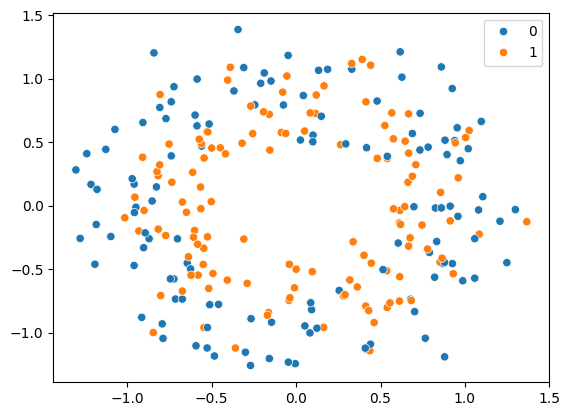

In [9]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [11]:
X_train.shape

(200, 2)

In [12]:
X_test.shape

(50, 2)

In [13]:
model=Sequential()

In [14]:
model=Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
7/7 - 0s - loss: 0.5146 - accuracy: 0.7550 - val_loss: 0.6956 - val_accuracy: 0.6800 - 45ms/epoch - 6ms/step
Epoch 502/3000
7/7 - 0s - loss: 0.5162 - accuracy: 0.7500 - val_loss: 0.7037 - val_accuracy: 0.6800 - 44ms/epoch - 6ms/step
Epoch 503/3000
7/7 - 0s - loss: 0.5177 - accuracy: 0.7500 - val_loss: 0.7018 - val_accuracy: 0.6800 - 60ms/epoch - 9ms/step
Epoch 504/3000
7/7 - 0s - loss: 0.5159 - accuracy: 0.7500 - val_loss: 0.6983 - val_accuracy: 0.6800 - 46ms/epoch - 7ms/step
Epoch 505/3000
7/7 - 0s - loss: 0.5148 - accuracy: 0.7500 - val_loss: 0.7000 - val_accuracy: 0.6600 - 45ms/epoch - 6ms/step
Epoch 506/3000
7/7 - 0s - loss: 0.5159 - accuracy: 0.7500 - val_loss: 0.7010 - val_accuracy: 0.6600 - 46ms/epoch - 7ms/step
Epoch 507/3000
7/7 - 0s - loss: 0.5165 - accuracy: 0.7450 - val_loss: 0.6933 - val_accuracy: 0.6600 - 46ms/epoch - 7ms/step
Epoch 508/3000
7/7 - 0s - loss: 0.5151 - accuracy: 0.7600 - val_loss: 0.6905 - va

In [17]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,verbose=0)

In [18]:
history.history['loss']

[0.49774491786956787,
 0.4973548948764801,
 0.4975860118865967,
 0.49820801615715027,
 0.4968061149120331,
 0.49663376808166504,
 0.498722106218338,
 0.4989998936653137,
 0.4970778226852417,
 0.4963207244873047,
 0.4972917437553406,
 0.497073769569397,
 0.49685391783714294,
 0.49681606888771057,
 0.49748653173446655,
 0.49654969573020935,
 0.49752798676490784,
 0.49777305126190186,
 0.4966947138309479,
 0.4978020489215851,
 0.4971718192100525,
 0.4974580705165863,
 0.49895182251930237,
 0.49753403663635254,
 0.4991273880004883,
 0.4968559741973877,
 0.4987143576145172,
 0.49719691276550293,
 0.4978632628917694,
 0.4970704913139343,
 0.4981596767902374,
 0.4980221092700958,
 0.4986214339733124,
 0.49756667017936707,
 0.49672889709472656,
 0.49805787205696106,
 0.49827510118484497,
 0.49629896879196167,
 0.4966016113758087,
 0.49768638610839844,
 0.49708813428878784,
 0.49721822142601013,
 0.4967785179615021,
 0.4964519441127777,
 0.49730560183525085,
 0.49705177545547485,
 0.49702548980

In [19]:
history.history['val_loss']

[0.7127772569656372,
 0.7185332775115967,
 0.7230278253555298,
 0.735159158706665,
 0.7278232574462891,
 0.7241162061691284,
 0.7252727746963501,
 0.7208513021469116,
 0.7215527296066284,
 0.7187539935112,
 0.7260292172431946,
 0.7298536896705627,
 0.7201668620109558,
 0.7139633893966675,
 0.7236424088478088,
 0.7246557474136353,
 0.7261810898780823,
 0.7269282341003418,
 0.7120524644851685,
 0.717802882194519,
 0.7169526815414429,
 0.719082772731781,
 0.7293018102645874,
 0.732474148273468,
 0.7391374111175537,
 0.7342186570167542,
 0.7210119366645813,
 0.7250720262527466,
 0.7291090488433838,
 0.7270641922950745,
 0.7354215383529663,
 0.732680082321167,
 0.7370561957359314,
 0.7266655564308167,
 0.7270954251289368,
 0.7319422960281372,
 0.7237675189971924,
 0.7248783707618713,
 0.738100528717041,
 0.7386297583580017,
 0.7314430475234985,
 0.7248889207839966,
 0.7261599898338318,
 0.7218984961509705,
 0.7172995209693909,
 0.7214582562446594,
 0.7289682626724243,
 0.7300263047218323,
 

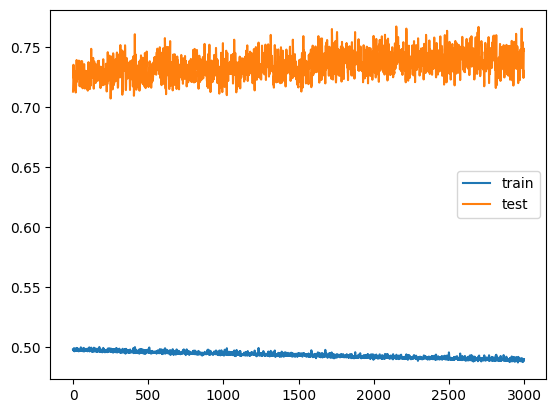

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:
model = Sequential()

model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
callback=EarlyStopping(
    monitor="accuracy",
    min_delta=0.01,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=30

)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,callbacks=callback)

Epoch 1/3000
7/7 [==============================] - 1s 32ms/step - loss: 0.6923 - accuracy: 0.5100 - val_loss: 0.6971 - val_accuracy: 0.4000
Epoch 2/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.5300 - val_loss: 0.7012 - val_accuracy: 0.4000
Epoch 3/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.6857 - accuracy: 0.5250 - val_loss: 0.7053 - val_accuracy: 0.4000
Epoch 4/3000
7/7 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.5250 - val_loss: 0.7077 - val_accuracy: 0.4000
Epoch 5/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.6823 - accuracy: 0.5250 - val_loss: 0.7101 - val_accuracy: 0.4000
Epoch 6/3000
7/7 [==============================] - 0s 9ms/step - loss: 0.6808 - accuracy: 0.5250 - val_loss: 0.7111 - val_accuracy: 0.4000
Epoch 7/3000
7/7 [==============================] - 0s 9ms/step - loss: 0.6793 - accuracy: 0.5250 - val_loss: 0.7137 - val_accuracy: 0.4000
Epoch 8/3000
7/7 [

In [24]:
#normalization
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [25]:
df=df.iloc[:,2:]

In [26]:
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

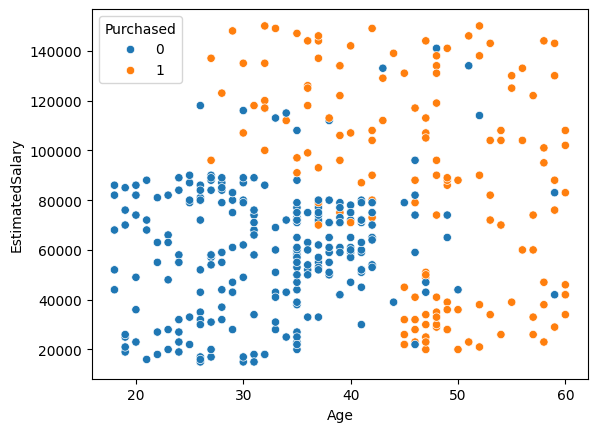

In [27]:
sns.scatterplot(x=df['Age'],y=df["EstimatedSalary"],hue=df["Purchased"])

In [28]:
df.shape

(400, 3)

In [29]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
X_train.shape

(320, 2)

In [31]:
X_test.shape

(80, 2)

In [32]:
model=Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
# here you will get trainable params
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=2)

Epoch 1/100
10/10 - 1s - loss: 2240.6047 - accuracy: 0.3594 - val_loss: 829.7433 - val_accuracy: 0.6000 - 992ms/epoch - 99ms/step
Epoch 2/100
10/10 - 0s - loss: 1022.6177 - accuracy: 0.6531 - val_loss: 598.9363 - val_accuracy: 0.6000 - 49ms/epoch - 5ms/step
Epoch 3/100
10/10 - 0s - loss: 545.0164 - accuracy: 0.3781 - val_loss: 286.1232 - val_accuracy: 0.4000 - 46ms/epoch - 5ms/step
Epoch 4/100
10/10 - 0s - loss: 335.6723 - accuracy: 0.5906 - val_loss: 162.7707 - val_accuracy: 0.6000 - 59ms/epoch - 6ms/step
Epoch 5/100
10/10 - 0s - loss: 135.9469 - accuracy: 0.4531 - val_loss: 107.1661 - val_accuracy: 0.6000 - 47ms/epoch - 5ms/step
Epoch 6/100
10/10 - 0s - loss: 69.8582 - accuracy: 0.4719 - val_loss: 44.3788 - val_accuracy: 0.4000 - 50ms/epoch - 5ms/step
Epoch 7/100
10/10 - 0s - loss: 113.4967 - accuracy: 0.4719 - val_loss: 30.5213 - val_accuracy: 0.6000 - 46ms/epoch - 5ms/step
Epoch 8/100
10/10 - 0s - loss: 38.9487 - accuracy: 0.5406 - val_loss: 71.0511 - val_accuracy: 0.6000 - 45ms/ep

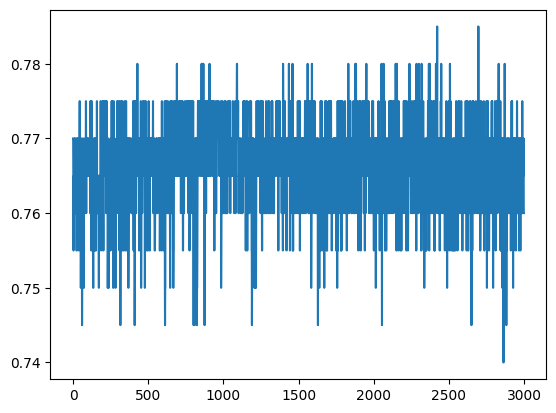

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

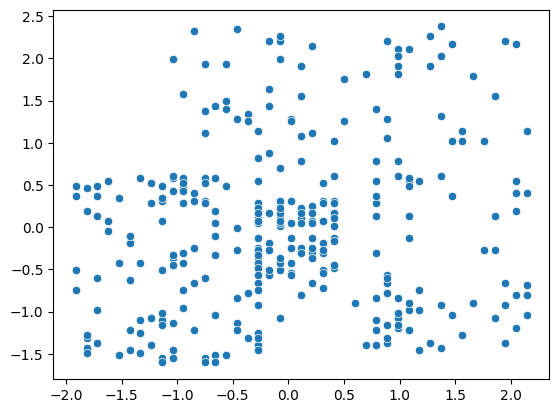

In [39]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [40]:
callback=EarlyStopping(
    monitor="accuracy",
    min_delta=0.001,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=20

)

In [41]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose=2,callbacks=callback)

Epoch 1/100
10/10 - 0s - loss: 0.6772 - accuracy: 0.6531 - val_loss: 0.6514 - val_accuracy: 0.6000 - 353ms/epoch - 35ms/step
Epoch 2/100
10/10 - 0s - loss: 0.5726 - accuracy: 0.7031 - val_loss: 0.5403 - val_accuracy: 0.7125 - 63ms/epoch - 6ms/step
Epoch 3/100
10/10 - 0s - loss: 0.4766 - accuracy: 0.7812 - val_loss: 0.4454 - val_accuracy: 0.7875 - 48ms/epoch - 5ms/step
Epoch 4/100
10/10 - 0s - loss: 0.4096 - accuracy: 0.8188 - val_loss: 0.3822 - val_accuracy: 0.8000 - 47ms/epoch - 5ms/step
Epoch 5/100
10/10 - 0s - loss: 0.3632 - accuracy: 0.8438 - val_loss: 0.3576 - val_accuracy: 0.8000 - 48ms/epoch - 5ms/step
Epoch 6/100
10/10 - 0s - loss: 0.3397 - accuracy: 0.8562 - val_loss: 0.3512 - val_accuracy: 0.8000 - 51ms/epoch - 5ms/step
Epoch 7/100
10/10 - 0s - loss: 0.3259 - accuracy: 0.8687 - val_loss: 0.3480 - val_accuracy: 0.8250 - 48ms/epoch - 5ms/step
Epoch 8/100
10/10 - 0s - loss: 0.3185 - accuracy: 0.8750 - val_loss: 0.3390 - val_accuracy: 0.8250 - 61ms/epoch - 6ms/step
Epoch 9/100
10

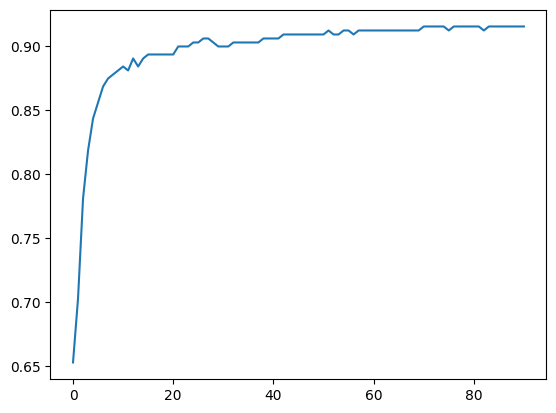

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

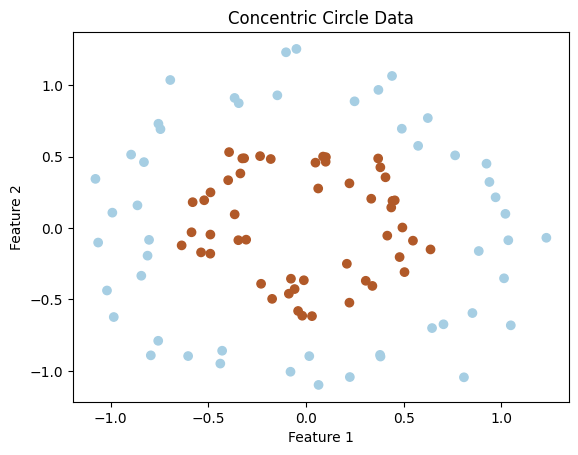

In [43]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate concentric circle data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Concentric Circle Data")
plt.show()

In [44]:
X

array([[-0.43879568, -0.94918776],
       [-0.30644971, -0.08094047],
       [ 0.47936668, -0.20279305],
       [ 0.41621039, -0.05266812],
       [-0.31671096,  0.48964985],
       [-0.74526611,  0.6936782 ],
       [-0.81138205, -0.19289806],
       [ 0.33994806, -0.40501407],
       [-1.07822253,  0.34515943],
       [-0.42945948, -0.85916611],
       [-0.75679206, -0.78949197],
       [-0.52126667,  0.19533164],
       [-0.18046004,  0.48425904],
       [ 0.20924568, -0.24978941],
       [-0.32622786,  0.48850829],
       [-1.06439753, -0.1010946 ],
       [-0.34646199, -0.08454935],
       [-0.98435751, -0.62300831],
       [ 0.03066452, -0.61667307],
       [-1.01913776, -0.43702131],
       [-0.82976802,  0.46251232],
       [ 0.40710848,  0.35629743],
       [-0.53746062, -0.16994594],
       [ 1.01412798, -0.35162779],
       [ 0.24863966,  0.88856726],
       [-0.23001735, -0.39001519],
       [-0.33600874,  0.38305512],
       [-0.60364261, -0.89640252],
       [-0.01926795,

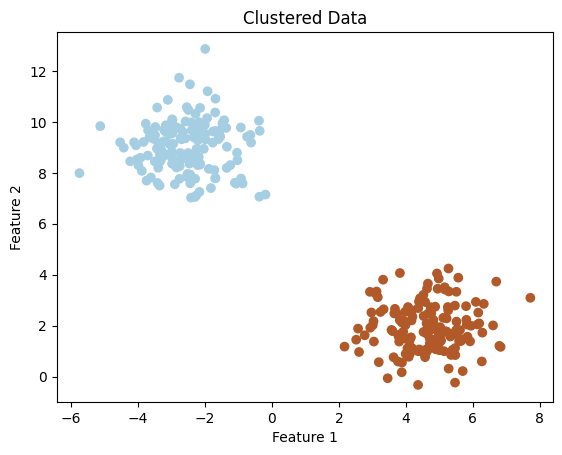

In [45]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate clustered data with make_blobs
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustered Data")
plt.show()

# Batch Normalization

1.the type of the data you are taking accuracy graph whenther you are able to increase the accuray or not after the BN

1.1 are you able to get a gernel model where there is no much difference between training and validation accuracy

2.complexity of the neural network
3.if data and complexity is too much then you can check with the time aslo BN will converge fast

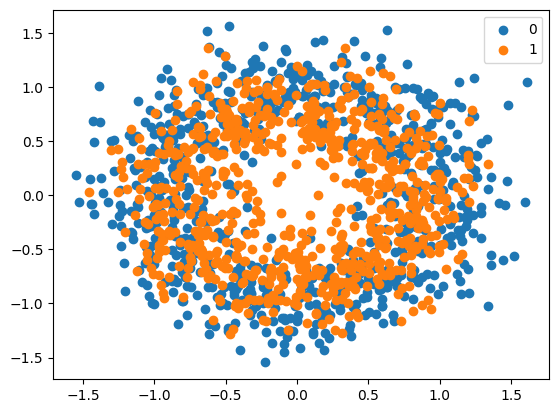

In [46]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt
# generate circles
X, y = make_circles(n_samples=1500, noise=0.25, random_state=1)
# select indices of points with each class label
for i in range(2):
 samples_ix = where(y == i)
 pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [47]:
import pandas as pd
df1=pd.DataFrame(X,columns=["x1","x2"])

In [48]:
df1.head()

,x1,x2
0,1.137489,1.045049
1,0.821596,0.750366
2,-0.164543,-0.919190
3,-0.888610,0.562668
4,0.318285,-0.500059


In [51]:
df2.head()

,class
0,0
1,0
2,1
3,0
4,1


In [52]:
df1.shape

(1500, 2)

In [53]:
df2.shape

(1500, 1)

In [50]:
df2=pd.DataFrame(y,columns=["class"])

In [54]:
data=pd.concat([df1,df2],axis=1)

In [55]:
data.head()

,x1,x2,class
0,1.137489,1.045049,0
1,0.821596,0.750366,0
2,-0.164543,-0.919190,1
3,-0.888610,0.562668,0
4,0.318285,-0.500059,1


In [56]:
data.shape

(1500, 3)

In [57]:
X = data.iloc[:,0:2].values
y = data.iloc[:,-1].values

In [58]:
X.shape

(1500, 2)

In [59]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [60]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [61]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
38/38 [==============================] - 3s 13ms/step - loss: 0.6985 - accuracy: 0.4942 - val_loss: 0.6953 - val_accuracy: 0.4933
Epoch 2/200
38/38 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.4892 - val_loss: 0.6947 - val_accuracy: 0.4767
Epoch 3/200
38/38 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.4875 - val_loss: 0.6944 - val_accuracy: 0.4867
Epoch 4/200
38/38 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.4758 - val_loss: 0.6940 - val_accuracy: 0.4567
Epoch 5/200
38/38 [==============================] - 0s 8ms/step - loss: 0.6942 - accuracy: 0.4533 - val_loss: 0.6938 - val_accuracy: 0.4800
Epoch 6/200
38/38 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.4833 - val_loss: 0.6936 - val_accuracy: 0.4867
Epoch 7/200
38/38 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5025 - val_loss: 0.6935 - val_accuracy: 0.4867
Epoch 8/200


In [64]:
 0.5250-0.4000

0.125

In [65]:
0.6967-0.6000

0.09670000000000001

# 1. fast training
# 2. for removing the covariate shift

In [66]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (Batch  (None, 3)                 12        
 Normalization)                                                  
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [67]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
38/38 [==============================] - 5s 17ms/step - loss: 0.8887 - accuracy: 0.4783 - val_loss: 0.6915 - val_accuracy: 0.5500
Epoch 2/200
38/38 [==============================] - 0s 5ms/step - loss: 0.8148 - accuracy: 0.4908 - val_loss: 0.6916 - val_accuracy: 0.5467
Epoch 3/200
38/38 [==============================] - 0s 5ms/step - loss: 0.7818 - accuracy: 0.4842 - val_loss: 0.6910 - val_accuracy: 0.5600
Epoch 4/200
38/38 [==============================] - 0s 5ms/step - loss: 0.7475 - accuracy: 0.5025 - val_loss: 0.6896 - val_accuracy: 0.5600
Epoch 5/200
38/38 [==============================] - 0s 6ms/step - loss: 0.7333 - accuracy: 0.4933 - val_loss: 0.6886 - val_accuracy: 0.5767
Epoch 6/200
38/38 [==============================] - 0s 8ms/step - loss: 0.7201 - accuracy: 0.5050 - val_loss: 0.6872 - val_accuracy: 0.5767
Epoch 7/200
38/38 [==============================] - 0s 8ms/step - loss: 0.7106 - accuracy: 0.5067 - val_loss: 0.6874 - val_accuracy: 0.5867
Epoch 8/200


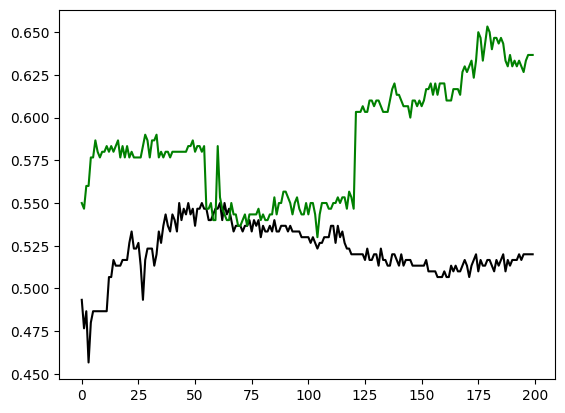

In [70]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

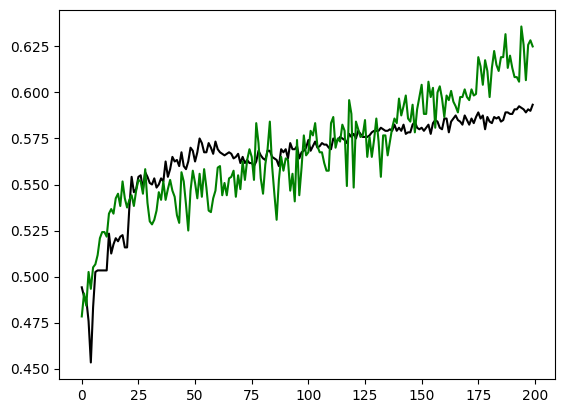

In [71]:
plt.plot(history1.history['accuracy'],color='black')
plt.plot(history2.history['accuracy'],color='green')

# Drop-Out

In [72]:
import numpy as np
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [73]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

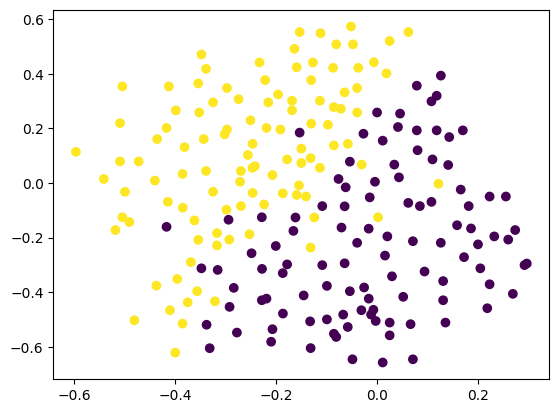

In [74]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [76]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33537 (131.00 KB)
Trainable params: 33537 (131.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [79]:
X.shape

(211, 2)

In [80]:
y.shape

(211,)

In [81]:
0.2*211

42.2

In [82]:
history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 3s 68ms/step - loss: 0.5235 - accuracy: 0.7679 - val_loss: 0.8351 - val_accuracy: 0.6279
Epoch 2/500
6/6 [==============================] - 0s 37ms/step - loss: 0.3469 - accuracy: 0.8750 - val_loss: 0.3115 - val_accuracy: 0.9070
Epoch 3/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2196 - accuracy: 0.9345 - val_loss: 0.3927 - val_accuracy: 0.8372
Epoch 4/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2018 - accuracy: 0.9226 - val_loss: 0.3824 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 21ms/step - loss: 0.2116 - accuracy: 0.9167 - val_loss: 0.4088 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 33ms/step - loss: 0.2055 - accuracy: 0.9226 - val_loss: 0.4204 - val_accuracy: 0.8372
Epoch 7/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2315 - accuracy: 0.9048 - val_loss: 0.3842 - val_accuracy: 0.8605
Epoch 8/500
6/6 [===

In [83]:
0.9940-0.8140

0.18000000000000005

In [84]:
(0.9702-0.7442)*100

22.599999999999998

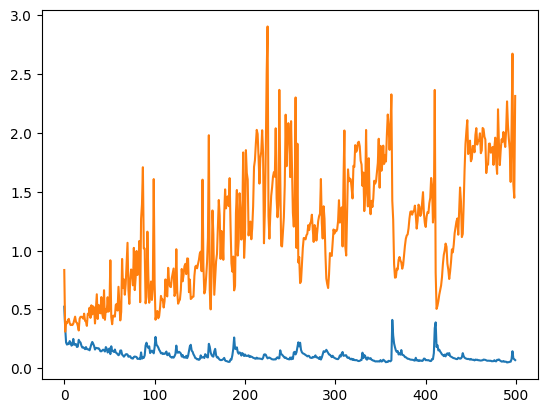

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

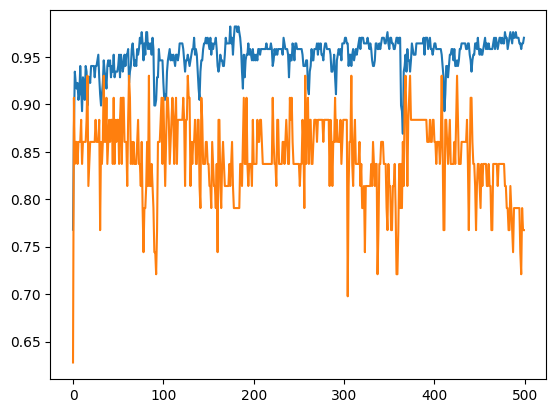

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [87]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.75))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.65))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.35))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 4s 62ms/step - loss: 0.6465 - accuracy: 0.6190 - val_loss: 0.6344 - val_accuracy: 0.5814
Epoch 2/500
6/6 [==============================] - 0s 17ms/step - loss: 0.4144 - accuracy: 0.8631 - val_loss: 0.8959 - val_accuracy: 0.6047
Epoch 3/500
6/6 [==============================] - 0s 17ms/step - loss: 0.3709 - accuracy: 0.8750 - val_loss: 0.7603 - val_accuracy: 0.6977
Epoch 4/500
6/6 [==============================] - 0s 17ms/step - loss: 0.4048 - accuracy: 0.8333 - val_loss: 0.5838 - val_accuracy: 0.6977
Epoch 5/500
6/6 [==============================] - 0s 16ms/step - loss: 0.3611 - accuracy: 0.8274 - val_loss: 0.4809 - val_accuracy: 0.6977
Epoch 6/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2801 - accuracy: 0.8869 - val_loss: 0.4813 - val_accuracy: 0.7209
Epoch 7/500
6/6 [==============================] - 0s 16ms/step - loss: 0.3122 - accuracy: 0.8690 - val_loss: 0.5263 - val_accuracy: 0.7442
Epoch 8/500
6/6 [===

In [88]:
 0.8750-0.8605

0.014499999999999957

In [89]:
0.9107-0.8605

0.05019999999999991

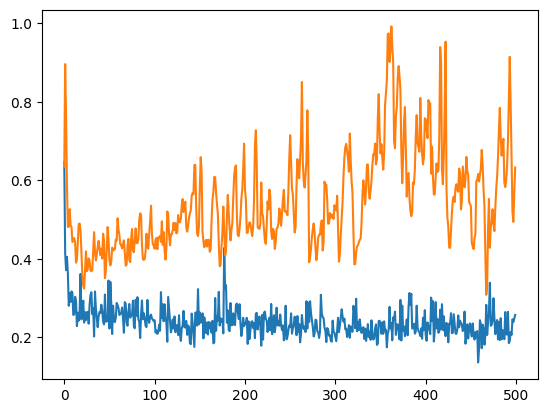

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

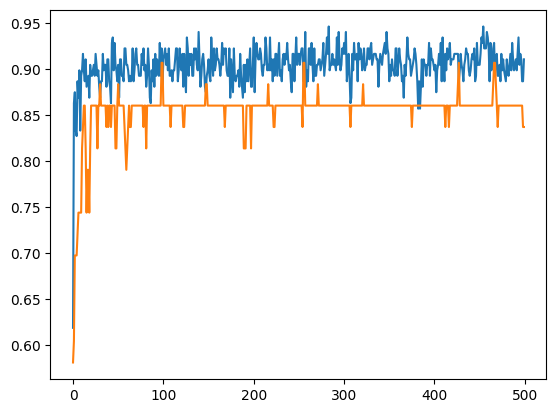

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Regularization

1. whenever you have limited data
2. if you have complex model
3. while training deep neural network
4. while weight are too huge
5. with high dimension data

In [92]:
import tensorflow

In [93]:
from sklearn.datasets import make_moons
X, y = make_moons(100,noise=0.3,random_state=2)

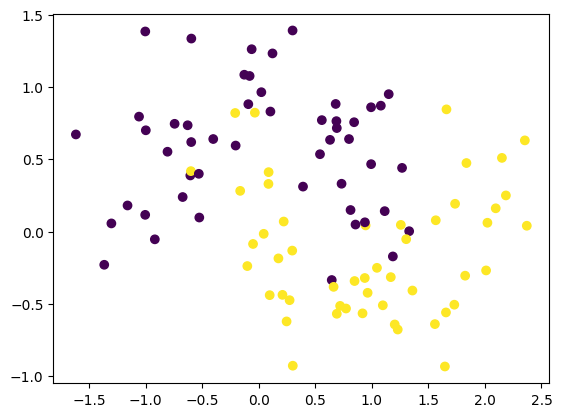

In [94]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [95]:
print(X)

[[ 0.94493687  0.04300959]
 [-0.59661667  1.3364723 ]
 [-0.10146246 -0.23842804]
 [-0.06304567  1.2627059 ]
 [ 0.99287486  0.86083134]
 [ 0.63017555  0.63509248]
 [ 0.64527331 -0.33515752]
 [-0.12816133  1.08607742]
 [-0.09264107  0.88224035]
 [ 1.07935066  0.8718443 ]
 [ 2.15044638  0.51032695]
 [ 1.65993559  0.84629567]
 [ 1.64607193 -0.93362689]
 [ 0.54133541  0.5358372 ]
 [ 1.18578357 -0.17186389]
 [ 0.29887054  1.39240581]
 [ 0.39114242  0.31161253]
 [-0.74445048  0.74634276]
 [ 0.22043346  0.06979801]
 [ 1.16747337 -0.31510162]
 [-0.60551158  0.38875206]
 [ 0.84316345  0.7572619 ]
 [ 1.04516536 -0.25068977]
 [-1.16091419  0.1810136 ]
 [ 0.27254841 -0.47465777]
 [ 0.81158401  0.14943079]
 [ 0.12125552  1.2336183 ]
 [ 1.20234455 -0.64270316]
 [ 1.22891867 -0.6778129 ]
 [ 0.17362239 -0.18539557]
 [ 0.66164226 -0.38245456]
 [ 0.85546461  0.04890891]
 [ 0.9934781   0.4669932 ]
 [-1.00476311  0.11609028]
 [-0.40292975  0.64096045]
 [ 1.72931702 -0.5059893 ]
 [ 0.68995133  0.71687993]
 

In [96]:
print(y)

[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0]


In [97]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               384       
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=1000, validation_split = 0.2,verbose=1)

Epoch 1/1000
3/3 [==============================] - 2s 147ms/step - loss: 0.6323 - accuracy: 0.6500 - val_loss: 0.4200 - val_accuracy: 0.8500
Epoch 2/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.4452 - accuracy: 0.7875 - val_loss: 0.2469 - val_accuracy: 0.9000
Epoch 3/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.4155 - accuracy: 0.8125 - val_loss: 0.2526 - val_accuracy: 0.9000
Epoch 4/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.4229 - accuracy: 0.8375 - val_loss: 0.3010 - val_accuracy: 0.9000
Epoch 5/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.4012 - accuracy: 0.8500 - val_loss: 0.2846 - val_accuracy: 0.9000
Epoch 6/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.3866 - accuracy: 0.8375 - val_loss: 0.2879 - val_accuracy: 0.8500
Epoch 7/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.4026 - accuracy: 0.8250 - val_loss: 0.2796 - val_accuracy: 0.9000
Epoch 8/1000

In [99]:
0.9762-0.9200

0.05619999999999992

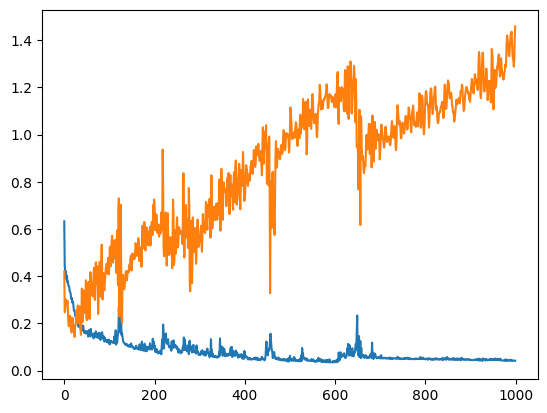

In [100]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [101]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

In [102]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               384       
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=1000, validation_split = 0.2,verbose=1)

Epoch 1/1000
3/3 [==============================] - 4s 284ms/step - loss: 1.8229 - accuracy: 0.5500 - val_loss: 1.4260 - val_accuracy: 0.8500
Epoch 2/1000
3/3 [==============================] - 0s 37ms/step - loss: 1.3599 - accuracy: 0.7750 - val_loss: 1.0428 - val_accuracy: 0.9000
Epoch 3/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.0836 - accuracy: 0.8000 - val_loss: 0.7990 - val_accuracy: 0.9000
Epoch 4/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.8980 - accuracy: 0.8125 - val_loss: 0.7129 - val_accuracy: 0.9000
Epoch 5/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.7860 - accuracy: 0.8375 - val_loss: 0.6927 - val_accuracy: 0.9000
Epoch 6/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.7390 - accuracy: 0.8500 - val_loss: 0.6381 - val_accuracy: 0.9000
Epoch 7/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6979 - accuracy: 0.8500 - val_loss: 0.5895 - val_accuracy: 0.9000
Epoch 8/1000

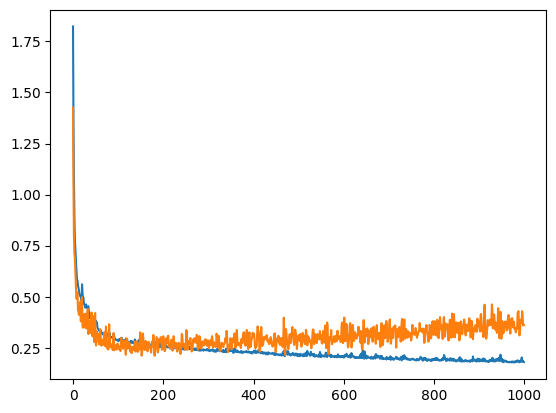

In [104]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [105]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

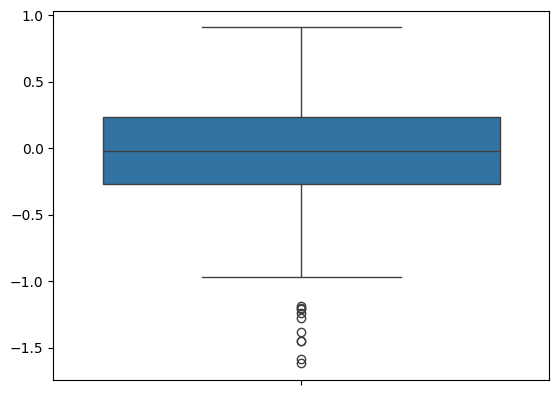

In [106]:
import seaborn as sns
sns.boxplot(model1_weight_layer1)

<Axes: >

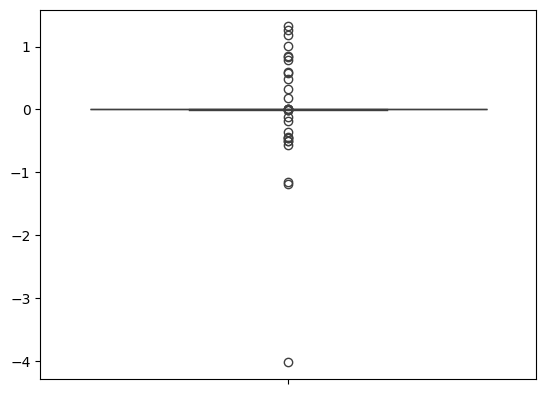

In [107]:
sns.boxplot(model2_weight_layer1)

In [108]:
model1_weight_layer1.min()

-1.6177007

In [109]:
model2_weight_layer1.min()

-4.0239344

<ipython-input-110-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-110-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

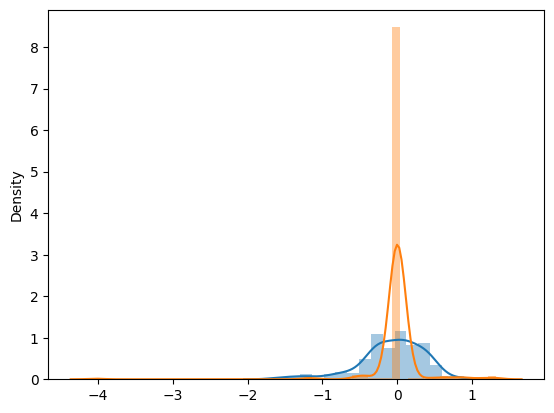

In [110]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [111]:
model1.get_weights()[0].reshape(256)

array([-0.13871574, -0.04455496, -0.08176744, -0.13189639,  0.02779876,
       -0.04032719,  0.21887444, -0.636295  , -0.33589476,  0.39742976,
       -0.95351696, -0.6937536 ,  0.04065711,  0.23527887,  0.41133434,
        0.35404098,  0.21250403,  0.0710234 ,  0.46277618, -0.9700086 ,
        0.11253262, -0.83506435,  0.040712  ,  0.36055428,  0.09044983,
       -0.12568296,  0.43789688,  0.07029733, -0.38867718, -0.67650616,
        0.22661932, -0.32052076,  0.11334161,  0.09813669, -0.22864327,
       -0.38396686,  0.14680205,  0.20414497,  0.16325334,  0.43259782,
       -0.04351204,  0.4610576 , -0.82732356, -0.29647297, -0.10340924,
        0.1198538 , -0.44311503,  0.00929653, -0.19609609,  0.4008231 ,
        0.04420407,  0.40306628, -0.4893018 , -0.06388795, -0.35258096,
        0.11026001,  0.2177582 ,  0.54279435,  0.13386253, -0.13194291,
       -0.18885036, -0.02437304, -0.6570665 ,  0.19633819, -0.3118101 ,
       -0.81251407,  0.19883294, -0.0399273 ,  0.39053902, -0.76

# Weight Initlization

In [112]:
column_names = ['Feature1', 'Feature2', 'Class']


In [113]:
data=pd.read_csv("https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv",header=None,names=column_names)

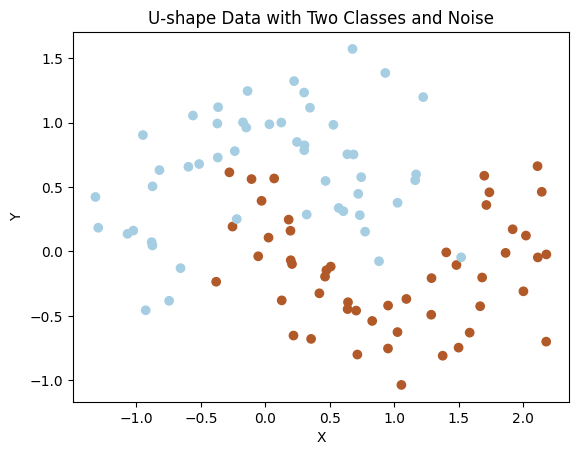

In [114]:
# Visualize the U-shape data with two classes and noise
plt.scatter(data['Feature1'], data['Feature2'], c=data["Class"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('U-shape Data with Two Classes and Noise')
plt.show()

In [115]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [116]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [117]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 2)                 6         
                                                                 
 dense_27 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
# Set parameters to 0
model.get_weights()

[array([[ 0.76556313,  0.6942322 ],
        [-1.0676079 ,  0.6662127 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8912703 ],
        [ 0.07797098]], dtype=float32),
 array([0.], dtype=float32)]

In [119]:
initial_weights = model.get_weights()

In [120]:
initial_weights

[array([[ 0.76556313,  0.6942322 ],
        [-1.0676079 ,  0.6662127 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8912703 ],
        [ 0.07797098]], dtype=float32),
 array([0.], dtype=float32)]

In [121]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*0.5

In [122]:
model.set_weights(initial_weights)

In [123]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [124]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [125]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 35ms/step - loss: 0.6904 - accuracy: 0.7125 - val_loss: 0.6972 - val_accuracy: 0.3625
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6845 - accuracy: 0.7125 - val_loss: 0.7014 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6790 - accuracy: 0.7125 - val_loss: 0.7058 - val_accuracy: 0.3625
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.7125 - val_loss: 0.7103 - val_accuracy: 0.3625
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6683 - accuracy: 0.7125 - val_loss: 0.7149 - val_accuracy: 0.3625
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6636 - accuracy: 0.7125 - val_loss: 0.7197 - val_accuracy: 0.3625
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6590 - accuracy: 0.7125 - val_loss: 0.7245 - val_accuracy: 0.3625
Epoch 8/

In [126]:
model.get_weights()

[array([[0.00554282, 0.00554282],
        [0.00555885, 0.00555885]], dtype=float32),
 array([0.00525305, 0.00525305], dtype=float32),
 array([[-0.30220607],
        [-0.30220607]], dtype=float32),
 array([-0.30036238], dtype=float32)]

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

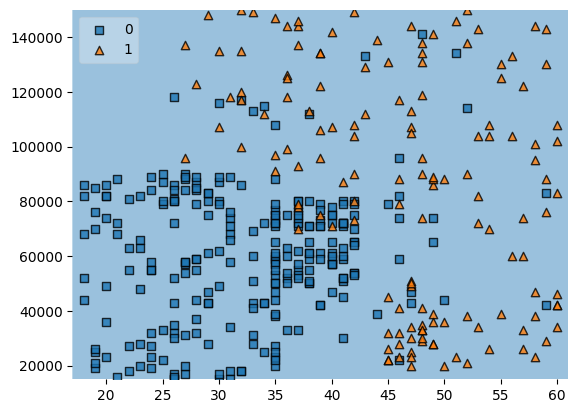

In [127]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [128]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                30        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
# Set parameters to 0
model.get_weights()

[array([[ 0.65922934, -0.47635782,  0.03374362,  0.44499522, -0.4992129 ,
          0.63332134,  0.39533538, -0.2691223 ,  0.5746868 ,  0.14415556],
        [-0.47692448,  0.08834893,  0.4574067 ,  0.45965332, -0.6405906 ,
          0.60432094, -0.12682545,  0.36444503,  0.2564152 ,  0.58190185]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.20495325],
        [-0.021649  ],
        [-0.60121626],
        [-0.47318467],
        [-0.6197339 ],
        [ 0.24634618],
        [-0.5760625 ],
        [-0.6126735 ],
        [-0.32232612],
        [-0.61471117]], dtype=float32),
 array([0.], dtype=float32)]

In [130]:
initial_weights = model.get_weights()

In [131]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)
initial_weights[1] = np.ones(model.get_weights()[1].shape)
initial_weights[2] = np.ones(model.get_weights()[2].shape)
initial_weights[3] = np.ones(model.get_weights()[3].shape)

In [132]:
model.set_weights(initial_weights)

In [133]:
model.get_weights()

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [134]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [135]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 7.8017 - accuracy: 0.2875 - val_loss: 3.9479 - val_accuracy: 0.6375
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 7.7249 - accuracy: 0.2875 - val_loss: 3.9081 - val_accuracy: 0.6375
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 7.6471 - accuracy: 0.2875 - val_loss: 3.8684 - val_accuracy: 0.6375
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 7.5683 - accuracy: 0.2875 - val_loss: 3.8290 - val_accuracy: 0.6375
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 7.4912 - accuracy: 0.2875 - val_loss: 3.7893 - val_accuracy: 0.6375
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 7.4134 - accuracy: 0.2875 - val_loss: 3.7497 - val_accuracy: 0.6375
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 7.3353 - accuracy: 0.2875 - val_loss: 3.7101 - val_accuracy: 0.6375
Epoch 8/1

In [136]:
model.get_weights()

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[0.06087999],
        [0.06087999],
        [0.06087999],
        [0.06087999],
        [0.06087999],
        [0.06087999],
        [0.06087999],
        [0.06087999],
        [0.06087999],
        [0.06087999]], dtype=float32),
 array([0.06087998], dtype=float32)]

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

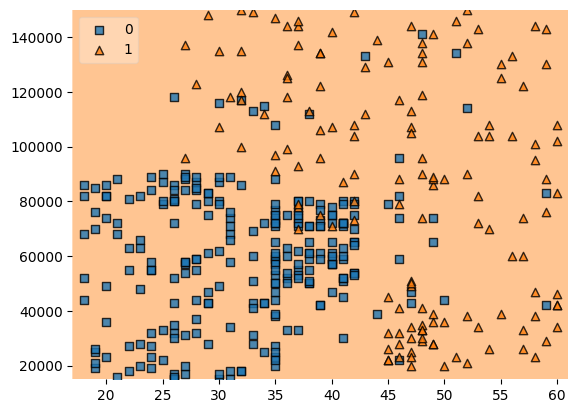

In [137]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)